# Implementing Neural Network in Pytorch, Task 3

In [2]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
from sklearn import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import math

## Fully functional Neural Network

In [3]:
class Loss(nn.Module):
    
    def __init__(self, criterion):
        super(Loss, self).__init__()
        self.criterion = self.loss_function(criterion)
    
    def current_loss_function(self):
        return self.criterion

    def loss_function(self, criterion):
        if criterion == 'cross_entropy':
            return nn.CrossEntropyLoss()
            
        elif criterion == 'mse':
            return nn.MSELoss()
        
        elif criterion == 'mae':
            return nn.L1Loss()
        
class Activation(nn.Module):
    
    def __init__(self, activation_type):
        super(Activation, self).__init__()
        self.activation_type = self.activation_func(activation_type)
     
    def activation_func(self, activation_type):
        if activation_type == 'relu':
            return nn.ReLU()
        elif activation_type == 'sigmoid':
            return nn.Sigmoid()
        elif activation_type == 'tanh':
            return nn.Tanh()
        elif activation_type == 'leaky_relu':
            return nn.LeakyReLU()
        elif activation_type == 'softmax':
            return nn.Softmax()
        

    def current_activation_function(self):
        return self.activation_type
    
    
class Optimizer(object):
    
    def __init__(self, model, optimizer_type, learning_rate):
        super(Optimizer, self).__init__()
        self.learning_rate = learning_rate
        self.model_params = model.parameters()
        self.optimizer_type = self.optimizer(optimizer_type)
    
    def current_optimizer(self):
        return self.optimizer_type
    
    def optimizer(self, optimizer_type):
        
        if optimizer_type == 'Adam':
            return torch.optim.Adam(self.model_params, lr=self.learning_rate)
            
        elif optimizer_type == 'SGD':
            return torch.optim.SGD(self.model_params, lr=self.learning_rate)
  

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
torch.Size([100, 1, 28, 28])



/Users/pedrojose/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


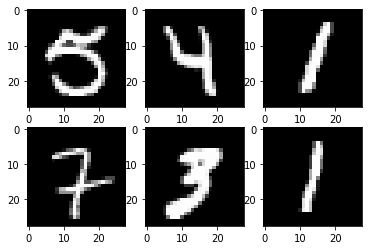

Epoch [1/2], Step [100/600], Loss: 0.4334
Epoch [1/2], Step [200/600], Loss: 0.3424
Epoch [1/2], Step [300/600], Loss: 0.2636
Epoch [1/2], Step [400/600], Loss: 0.2579
Epoch [1/2], Step [500/600], Loss: 0.1703
Epoch [1/2], Step [600/600], Loss: 0.2855
Epoch [2/2], Step [100/600], Loss: 0.1818
Epoch [2/2], Step [200/600], Loss: 0.1302
Epoch [2/2], Step [300/600], Loss: 0.1182
Epoch [2/2], Step [400/600], Loss: 0.1500
Epoch [2/2], Step [500/600], Loss: 0.1557
Epoch [2/2], Step [600/600], Loss: 0.1358
Accuracy of the network on the 10000 test images: 95.93 %


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyperparameters
input_size = 784
hidden_size = 128
hidden_size_two = 64
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                         transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

"""class Layer(nn.Module):
    
    def __init__(self, input_size, output_size, act_function):
        super(Layer, self).__init__()
        self.input_size = input_size
        
        self.layer = nn.Linear(input_size, output_size)
        self.activation_func = act_function
        self.output_size = output_size
    def input_size():
        return self.input_size
    
    def output_size():
        return self.output_size
    
    def layer(self):
        return self.layer
    
    def forward(self, x):
        out = self.layer(x)
        out = self.activation_func().current_activation_function(out)
        return out"""
        
        
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size_two, num_classes, act_function):
        super(NeuralNet, self).__init__()
        #self.layers = []

        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        #self.relu = nn.ReLU()
        self.act_func = act_function
        self.l2 = nn.Linear(hidden_size, hidden_size_two)  
        self.act_func = act_function
        self.l3 = nn.Linear(hidden_size_two, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        #out = self.relu(out)
        out = self.act_func(out)
        out = self.l2(out)
        out = self.act_func(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out


act_func = Activation('relu').current_activation_function()
model = NeuralNet(input_size, hidden_size, hidden_size_two, num_classes, act_func).to(device)

# Loss and optimizer
#model.forward
criterion = Loss('cross_entropy').current_loss_function()#nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
optimizer = Optimizer(model, 'Adam', learning_rate=learning_rate).current_optimizer()

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        #optimizer.optimize(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')